In [1]:
import pandas as pd

C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df3 = pd.read_csv("E:\\1. Sem 3\\3. Results\\5. Apr New Data\\4. Two step model_dataset\\2StepTT1-3added\\Hdmodeldatasetfinal2stepsTT_F1-3DTF2meansStd.csv")
df3

Bus_Stop_1  Bus_Stop_2  Bus_No_1  Bus_No_2  TT_L_1-3  Dwell_Time_L1  \
0              1           3       381      9526    159.54           8.46   
1              1           3      9526     20908    123.05           8.95   
2              1           3     20908     34197     99.28           8.72   
3              1           3     34197     48637    133.88           8.12   
4              1           3     48637     63874    134.01           8.99   
...          ...         ...       ...       ...       ...            ...   
3089          29          27     55212     70442    263.48          16.52   
3090          29          27     70442     85174    558.67          16.33   
3091          29          27     85174     99943    689.18          16.82   
3092          29          27     99943    114518    666.88          17.12   
3093          29          27    114518    128554    290.18          17.52   

      Bus_Stop_3  Time_Headway_1  Time_Headway_3  Mean_TT_F2  ...   ts  \
0              4      1186.00000      1150.00000   67.337500  ...  ts1   
1              4      1230.00000      1206.00000   67.337500  ...  ts1   
2              4      1187.00000      1221.00000   72.600000  ...  ts2   
3              4      1188.00000      1189.00000   89.352500  ...  ts3   
4              4      1207.00000      1229.00000   89.352500  ...  ts3   
...          ...             ...             ...         ...  ...  ...   
3089          28      1293.00000      1588.00000  242.612169  ...  ts5   
3090          28      1114.00000      1245.00000  293.551480  ...  ts6   
3091          28      1111.00000      1089.00000  236.427034  ...  ts7   
3092          28      1281.00000       904.70000  236.427034  ...  ts7   
3093          28      1227.72727      1227.72727  236.427034  ...  ts7   

      Travel_Time_F2  Travel_Time_F3   std_TT_F2  std_TT_F3 TT_F_1_3DTF2  \
0               65.0            67.0   11.455257  14.235874        123.1   
1               54.0            54.0   11.455257  14.235874         99.3   
2               76.0            66.0   21.573375  12.715097        133.9   
3               99.0            44.0   21.201983  14.686028        134.0   
4               97.0            68.0   21.201983  14.686028        156.3   
...              ...             ...         ...        ...          ...   
3089           311.0           264.0  177.994679  90.480340        558.7   
3090           377.0           329.0  133.943993  80.907296        689.2   
3091           368.0           316.0  129.925109  62.758048        666.9   
3092           156.0           151.7  129.925109  62.758048        290.2   
3093           156.0           151.7  129.925109  62.758048        290.8   

      std_TT_F1_3  mean_TT_F1_3  Travel_Time_L2  Time_Headway_2  
0       17.188293     99.672500            69.5      1173.00000  
1       17.188293     99.672500            56.1      1219.00000  
2       18.639615    125.950000            45.3      1209.00000  
3       22.774939    133.360000            67.9      1211.00000  
4       22.774939    133.360000            90.0      1205.00000  
...           ...           ...             ...             ...  
3089   213.870186    396.530000           166.5      1421.00000  
3090   167.367169    465.940909           294.7      1180.00000  
3091   147.796842    392.400000           360.2      1102.00000  
3092   147.796842    392.400000           350.9      1069.00000  
3093   147.796842    392.400000           138.5      1227.72727  

[3094 rows x 25 columns]

In [7]:
df3.columns

Index(['Bus_Stop_1', 'Bus_Stop_2', 'Bus_No_1', 'Bus_No_2', 'TT_L_1-3',
       'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1', 'Time_Headway_3',
       'Mean_TT_F2', 'Mean_TT_F3', 'mean_TH1', 'mean_TH2', 'mean_TH3',
       'Dwell_Time_F1', 'ts', 'Travel_Time_F2', 'Travel_Time_F3', 'std_TT_F2',
       'std_TT_F3', 'TT_F_1_3DTF2', 'std_TT_F1_3', 'mean_TT_F1_3',
       'Travel_Time_L2', 'Time_Headway_2'],
      dtype='object')

### 2 - Step

### KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
R-squared Score: 0.7933741656804347
Adjusted R-squared Score: 0.7899757144580735
Mean Squared Error: 6188.553052738611
Root Mean Squared Error: 78.6673569705924
Mean Absolute Error: 37.81738404025408
Mean Absolute Percentage Error (MAPE) : 3.282029983305125


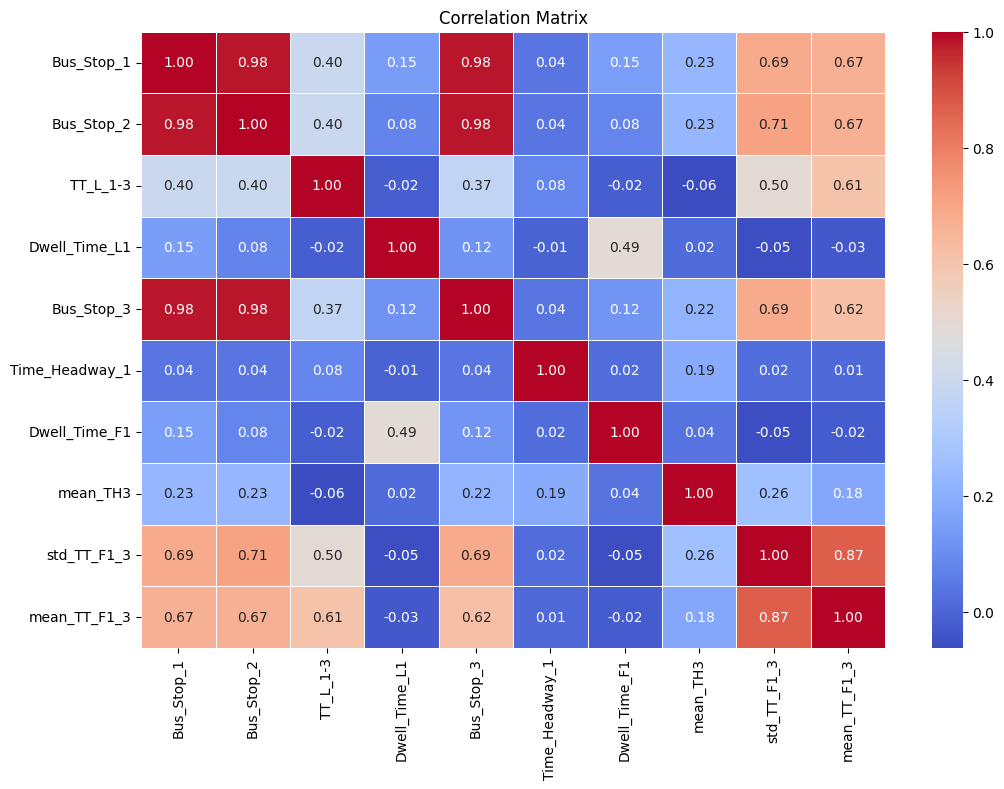

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[  'Bus_Stop_1', 'Bus_Stop_2',
       'TT_L_1-3', 'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1',
        'Dwell_Time_F1', 'mean_TH3',
        'std_TT_F1_3',
       'mean_TT_F1_3']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_3']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 670)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the grid search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)

# Make predictions on the test data using the best model
best_knn_regressor = grid_result.best_estimator_
Y_pred = best_knn_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Make predictions on the training data using the best model
Y_train_pred = best_knn_regressor.predict(X_train)

# Calculate Mean Absolute Percentage Error (MAPE) on training data
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# Calculate MAPE on training data
mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)


# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### XG-BOOST

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
R-squared Score: 0.8099605165789932
Adjusted R-squared Score: 0.8068348671806214
Mean Squared Error: 4225.417371902199
Root Mean Squared Error: 65.00321047380814
R-squared Score on Entire Data: 0.8219873570509126
Mean Absolute Error: 35.2580176209991
Mean Absolute Percentage Error (MAPE) : 2.989415722217638
R-squared Score on Entire Data: 0.8219873570509126


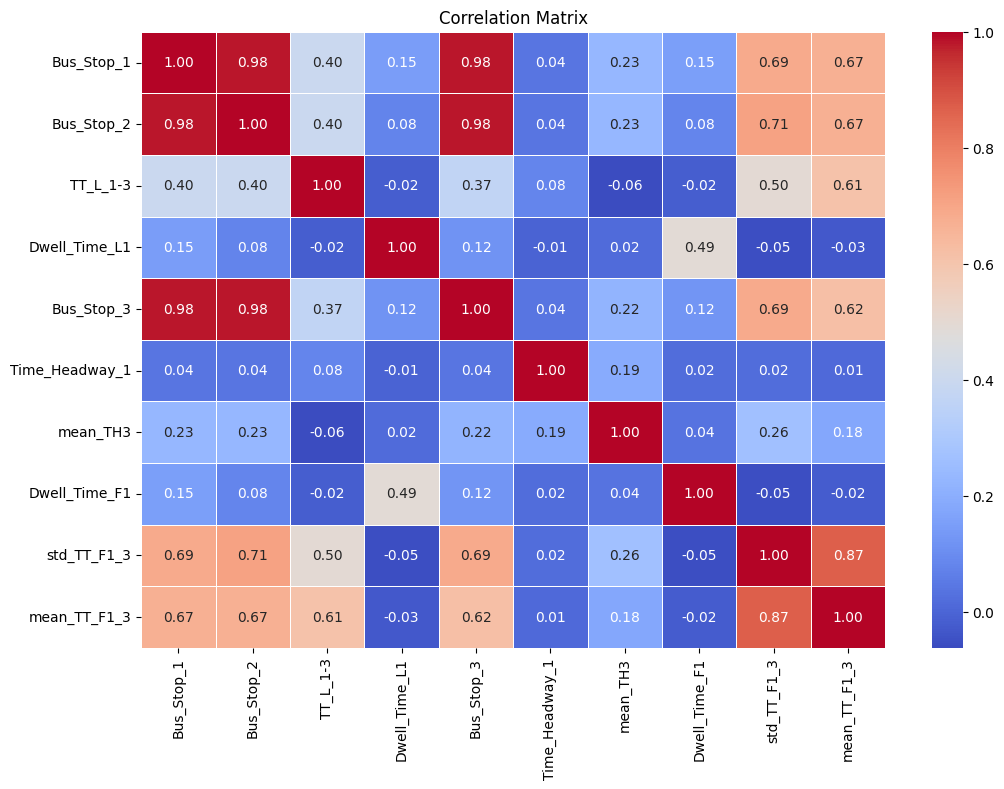

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[  'Bus_Stop_1', 'Bus_Stop_2',
       'TT_L_1-3', 'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1','mean_TH3',
        'Dwell_Time_F1',
        'std_TT_F1_3',
       'mean_TT_F1_3']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_3']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=221)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_xgb_regressor = grid_search.best_estimator_
Y_pred = best_xgb_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Y_predict = best_xgb_regressor.predict(X)
r2_Y = r2_score(Y,Y_predict)
print("R-squared Score on Entire Data:", r2_Y)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)

Y_predict = best_xgb_regressor.predict(X)
r2_Y = r2_score(Y, Y_predict)
print("R-squared Score on Entire Data:", r2_Y)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [15]:
import plotly.graph_objects as go

# Get feature importance scores
feature_importance = best_xgb_regressor.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance scores and feature names
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Round feature importance values to 2 decimal points
sorted_feature_importance_rounded = np.round(sorted_feature_importance, 2)

# Create trace for vertical bar chart
fig = go.Figure(go.Bar(
    y=sorted_feature_names,
    x=sorted_feature_importance_rounded,
    text=sorted_feature_importance_rounded,  # Show rounded feature importance values
    textposition='auto',  # Place text inside the bars
    marker=dict(color='skyblue'),  # Bar color
    orientation='h',  # Horizontal bars
))

# Update layout
fig.update_layout(
    title='XGBoost Feature Importance',
    xaxis_title='Feature Importance',
    yaxis_title='Features',
)

# Show the plot
fig.show()


In [16]:
# Print features and their importance scores
for feature, importance in zip(sorted_feature_names, sorted_feature_importance_rounded):
    print(f"{feature}: {importance}")

Time_Headway_1: 0.5400000214576721
std_TT_F1_3: 0.10000000149011612
mean_TH3: 0.10000000149011612
TT_L_1-3: 0.09000000357627869
mean_TT_F1_3: 0.05000000074505806
Bus_Stop_3: 0.05000000074505806
Dwell_Time_F1: 0.03999999910593033
Dwell_Time_L1: 0.019999999552965164
Bus_Stop_1: 0.009999999776482582
Bus_Stop_2: 0.0


In [11]:
import plotly.graph_objects as go

# Get feature importance scores
feature_importance = best_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance scores and feature names
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Create trace for vertical bar chart
fig = go.Figure(go.Bar(
    x=sorted_feature_names,
    y=sorted_feature_importance,
    text=sorted_feature_importance,  # Show feature importance values
    textposition='auto',  # Place text inside the bars
    marker=dict(color='skyblue'),  # Bar color
))

# Update layout
fig.update_layout(
    title='Random Forest Feature Importance',
    xaxis_title='Features',
    yaxis_title='Feature Importance',
)

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

# Show the plot
fig.show()


### LS-SVM

In [8]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define Mean Absolute Percentage Error (MAPE) function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[[ 'TT_L_1-3', 'Dwell_Time_L1', 'Time_Headway_1', 'Dwell_Time_F1','mean_TH3', 'std_TT_F1_3', 'mean_TT_F1_3']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_3']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=927)

# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LS SVM model
model = SVR(kernel='linear')

# Define the grid search parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon insensitive loss parameter
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters and score
print("Best Parameters:", grid_result.best_params_)

# Make predictions on the test data using the best model
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)

# Print evaluation metrics
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)



Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 100, 'epsilon': 0.1}
R-squared Score: 0.8599890745449692
Adjusted R-squared Score: 0.8583850213891833
Mean Squared Error: 3830.006238591159
Root Mean Squared Error: 61.88704419013045
Mean Absolute Error: 33.07399591317827
Mean Absolute Percentage Error (MAPE): 2.6638921365642063


In [19]:
correlations = df.corr()['Time_Headway_3']
correlations

Bus_Stop_1        0.085257
Bus_Stop_2        0.081375
TT_L_1-3         -0.130622
Dwell_Time_L1    -0.031981
Bus_Stop_3        0.080999
Time_Headway_1    0.758620
Dwell_Time_F1     0.043294
mean_TH3          0.302421
std_TT_F1_3       0.082193
mean_TT_F1_3      0.059158
Time_Headway_3    1.000000
Name: Time_Headway_3, dtype: float64

In [23]:
import pandas as pd

# Define the columns you want to include in the correlation matrix
selected_columns = ['TT_L_1-3', 'Dwell_Time_L1', 'Dwell_Time_F1','Time_Headway_1', 'mean_TH3', 'std_TT_F1_3', 'mean_TT_F1_3', 'Time_Headway_3']

# Select the columns from the training dataset
df_selected = df[selected_columns]

# Calculate correlation matrix
correlation_matrix = df_selected.corr()

print("Correlation Matrix with 'Time_Headway_3':")
correlation_matrix['Time_Headway_3']


Correlation Matrix with 'Time_Headway_3':


TT_L_1-3         -0.130622
Dwell_Time_L1    -0.031981
Dwell_Time_F1     0.043294
Time_Headway_1    0.758620
mean_TH3          0.302421
std_TT_F1_3       0.082193
mean_TT_F1_3      0.059158
Time_Headway_3    1.000000
Name: Time_Headway_3, dtype: float64

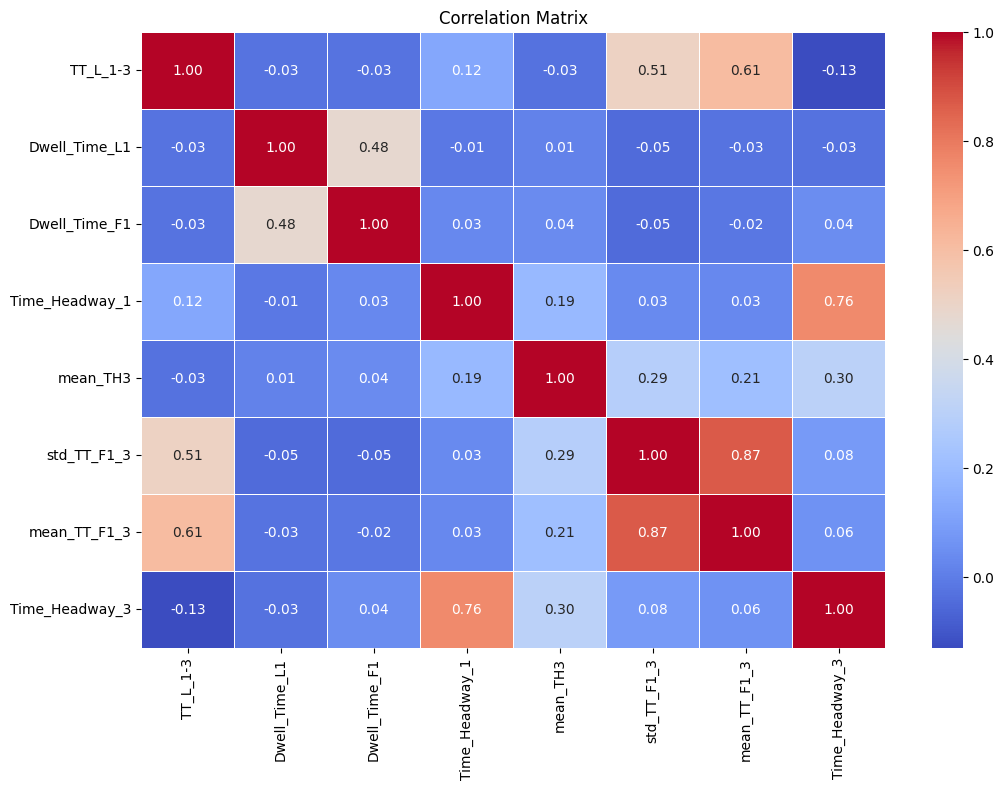

In [30]:
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Random Forest

C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning:


540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
346 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\BALASAHEB MULE\anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
R-squared Score: 0.7529642735781196
Adjusted R-squared Score: 0.7493134992960229
Mean Squared Error: 6084.553727903316
Root Mean Squared Error: 78.00354945708122
Mean Absolute Error: 39.78617121214359
Mean Absolute Percentage Error (MAPE): 3.30673945530832


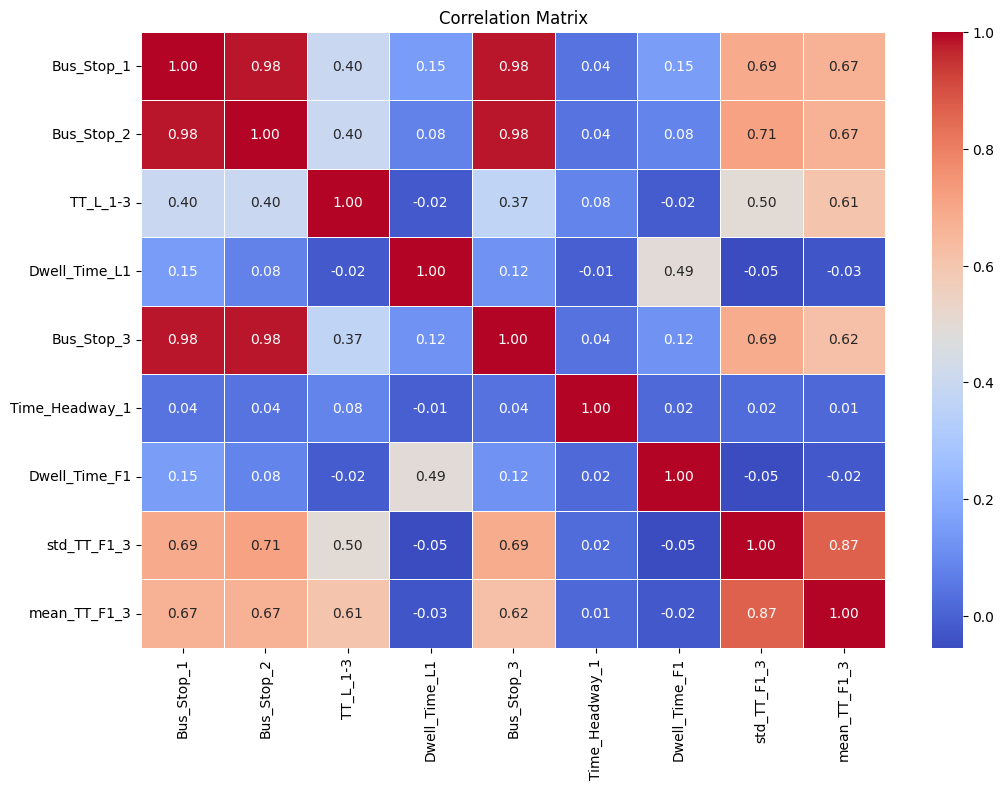

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'TT_L_1-3', 'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1', 'Dwell_Time_F1', 'std_TT_F1_3', 'mean_TT_F1_3']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_3']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=30),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)

# Print evaluation metrics
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Gradient Boosting

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error: 5397.292306179775
R-squared Score: 0.7887783547818917
Adjusted R-squared Score: 0.7856568526358113
Mean Absolute Error: 39.15934592652319
Root Mean Squared Error: 73.46626645052663
Mean Absolute Percentage Error (MAPE): 3.394181901865345


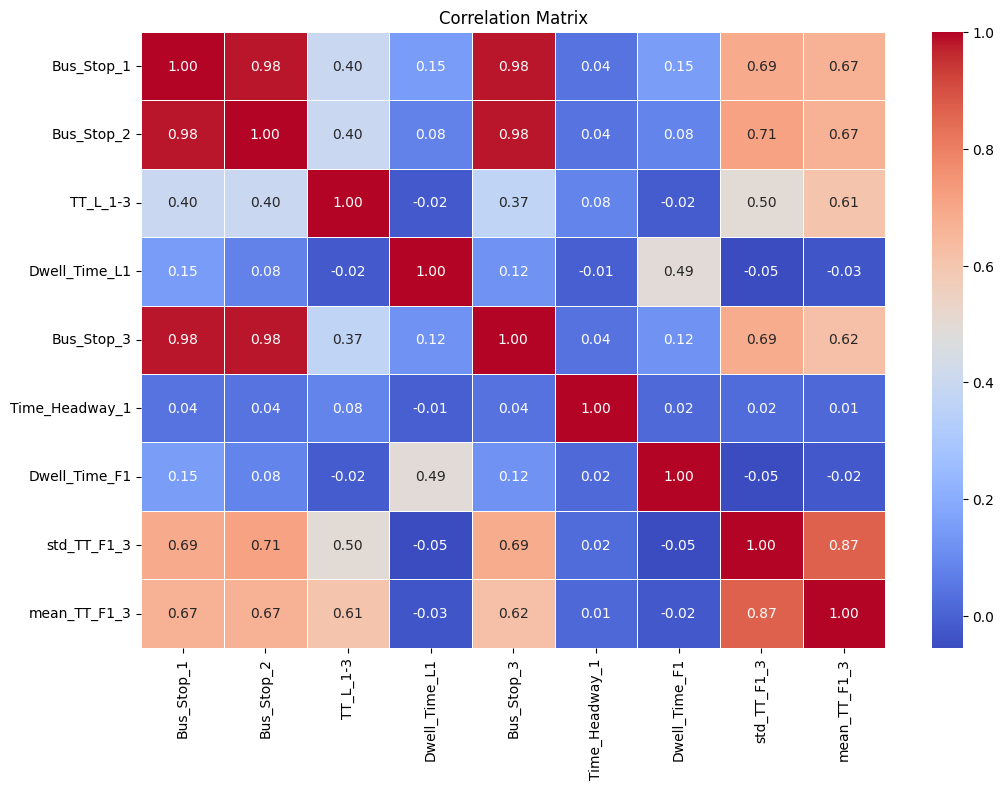

In [20]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Assuming your DataFrame is named df1
# Split the data into features (X) and target variable (Y)
X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'TT_L_1-3', 'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1', 'Dwell_Time_F1', 'std_TT_F1_3', 'mean_TT_F1_3']]  # Exclude 'Target_Headway_3' column from features
Y = df3['Time_Headway_3']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=94)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=94),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adj_r2 = adjusted_r2_score(Y_test, Y_pred, X_train.shape[1])
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred) # You need to define this function

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adj_r2)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Single Step

In [82]:
df3.columns

Index(['Unnamed: 0', 'Bus_Stop_1', 'Bus_Stop_2', 'Bus_No_1', 'Bus_No_2',
       'TT_L_1-3', 'Dwell_Time_L1', 'Bus_Stop_3', 'Time_Headway_1',
       'Time_Headway_3', 'Mean_TT_F2', 'Mean_TT_F3', 'mean_TH1', 'mean_TH2',
       'mean_TH3', 'Dwell_Time_F1', 'ts', 'Travel_Time_F2', 'Travel_Time_F3',
       'std_TT_F2', 'std_TT_F3', 'TT_F_1_3DTF2', 'std_TT_F1_3',
       'mean_TT_F1_3'],
      dtype='object')

### KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
R-squared Score: 0.9187679648499079
R-squared Score on Entire Dataset: 0.9783995214299428
Adjusted R-squared Score: 0.9175674914240444
Mean Squared Error: 2086.176985509184
Root Mean Squared Error: 45.67468648506724
Mean Absolute Error: 23.57686915823664
Mean Absolute Percentage Error (MAPE): 1.9449253708560006


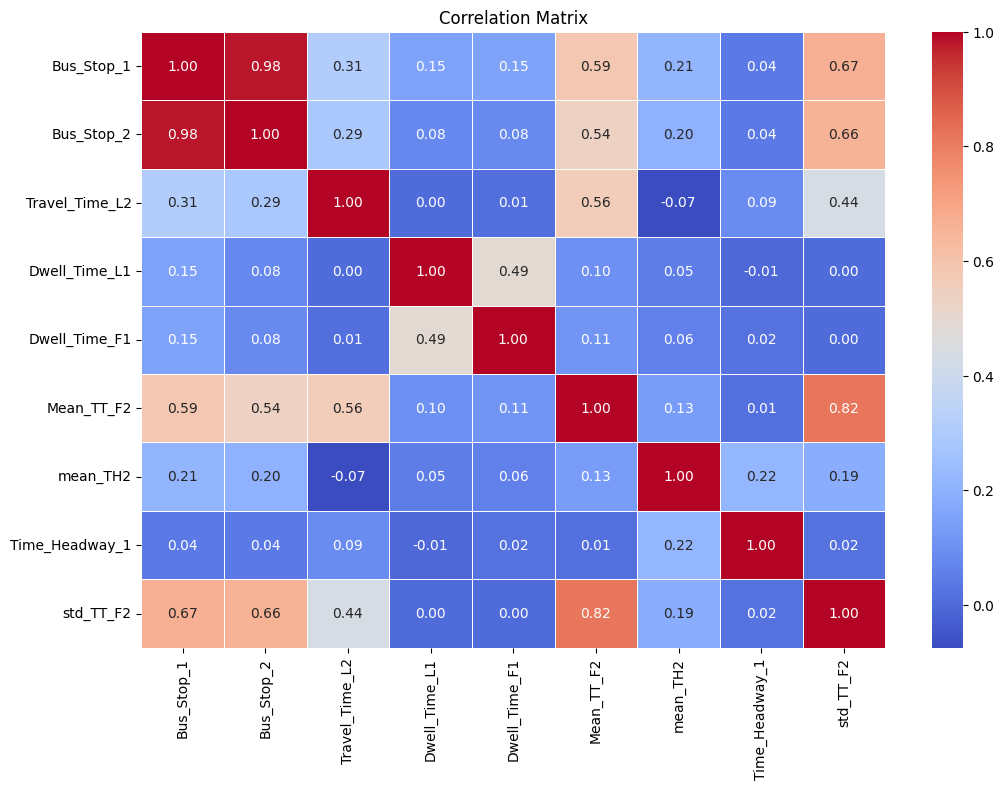

Cross-validated R-squared scores: [0.93713513 0.85387699 0.7623983  0.77687364 0.76594265]


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df3['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Initialize the KNN regressor
knn_regressor = KNeighborsRegressor()

# Define the grid search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Perform grid search
grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train, Y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)

# Make predictions on the test data using the best model
best_knn_regressor = grid_result.best_estimator_
Y_pred = best_knn_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)


# Make predictions on the entire dataset using the best model
Y_pred_entire = best_knn_regressor.predict(X)
# Calculate R-squared (R2) score on the entire dataset
r2_entire = r2_score(Y, Y_pred_entire)
print("R-squared Score on Entire Dataset:", r2_entire)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Cross-validation
cv_scores = cross_val_score(best_knn_regressor, X, Y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cv_scores)


### XG-BOOST

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
R-squared Score: 0.9222727111922194
Adjusted R-squared Score: 0.9211240320472769
Mean Squared Error: 1996.1691315157632
Root Mean Squared Error: 44.67850860890237
Mean Absolute Error: 24.549082538810076
Mean Absolute Percentage Error (MAPE): 2.0034989691740317


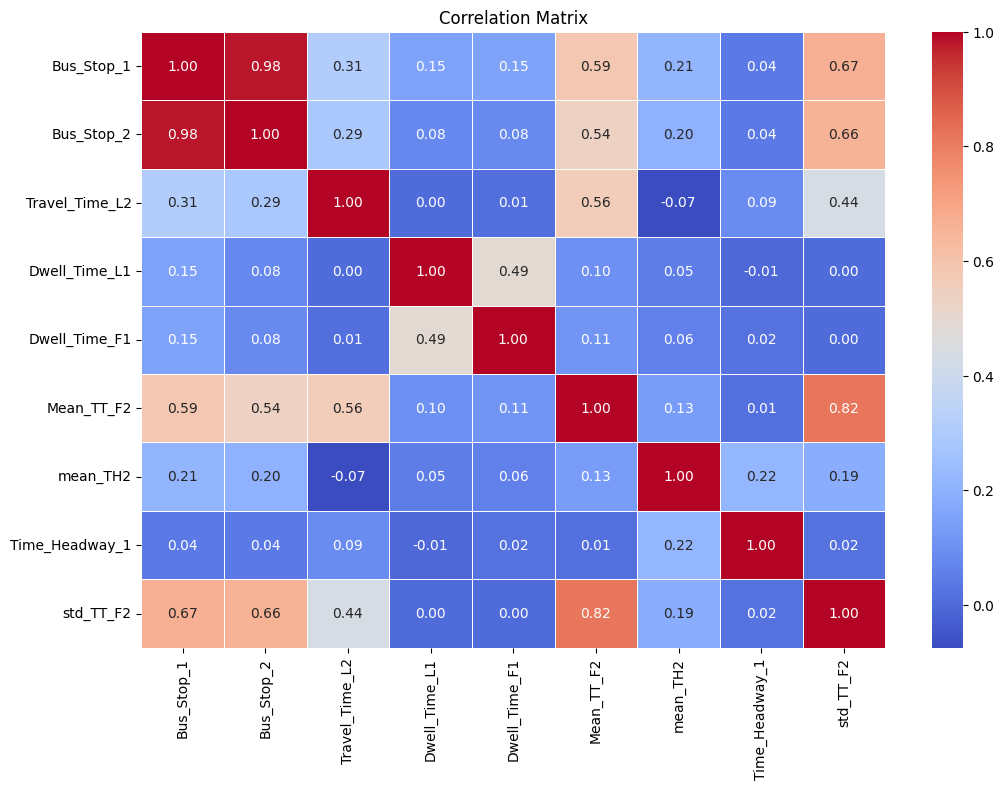

Cross-validated R-squared scores: [0.94460848 0.82432763 0.77903852 0.7410662  0.82772352]


In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df3['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test data using the best model
best_xgb_regressor = grid_search.best_estimator_
Y_pred = best_xgb_regressor.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# Residual Analysis

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Cross-validation
cv_scores = cross_val_score(best_xgb_regressor, X, Y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cv_scores)



In [29]:
# Make predictions on the entire dataset using the best model
Y_pred_entire = best_xgb_regressor.predict(X)

# Calculate R-squared (R2) score on the entire dataset
r2_entire = r2_score(Y, Y_pred_entire)
print("R-squared Score on Entire Dataset:", r2_entire)

R-squared Score on Entire Dataset: 0.9200696275795144


### LS-SVM

In [25]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df3['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

# Feature scaling (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the LS SVM model
model = SVR(kernel='linear')

# Define the grid search parameters
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon insensitive loss parameter
}
# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_result = grid_search.fit(X_train_scaled, Y_train)

# Print the best parameters and score
print("Best Parameters: ", grid_result.best_params_)

# Make predictions on the test data using the best model
best_model = grid_result.best_estimator_
Y_pred = best_model.predict(X_test_scaled)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)


# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)


# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_pred) / Y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters:  {'C': 1, 'epsilon': 0.1}
R-squared Score: 0.9267048762877192
Adjusted R-squared Score: 0.9256216971195574
Mean Squared Error: 1786.3474760582337
Root Mean Squared Error: 42.26520408158742
Mean Absolute Error: 20.74043157883655
Mean Absolute Percentage Error (MAPE): 1.7596117126797226


In [31]:
X_scaled = scaler.transform(X)
# Make predictions on the entire dataset using the best model
Y_pred_entire = best_model.predict(X_scaled)

# Calculate R-squared (R2) score on the entire dataset
r2_entire = r2_score(Y, Y_pred_entire)
print("R-squared Score on Entire Dataset:", r2_entire)

R-squared Score on Entire Dataset: 0.8456783960259611


### Random Forest

In [15]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
R-squared Score: 0.782476577337465
Adjusted R-squared Score: 0.779261945475457
Mean Squared Error: 3698.5647812341363
Root Mean Squared Error: 60.815826733130386
Mean Absolute Error: 28.438243016955568
Mean Absolute Percentage Error (MAPE) : 2.431183307312719


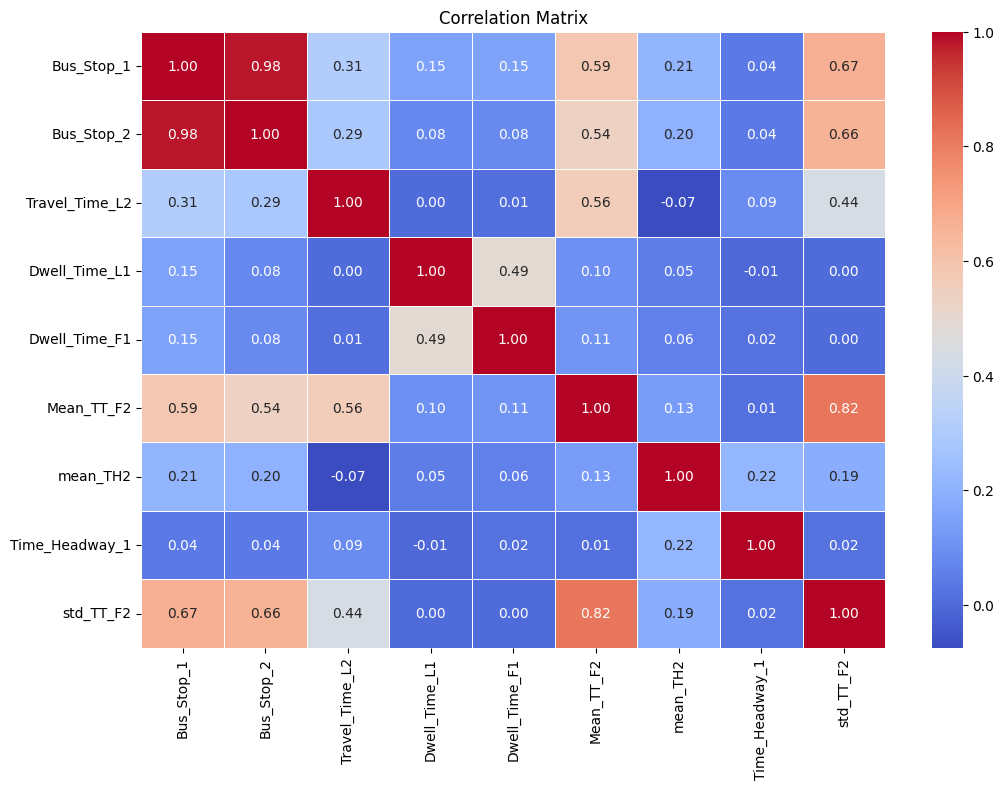

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Split the data into features (X) and target variable (Y)
X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df3['Time_Headway_2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Define mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE on training data
mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)


# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Gradient Boosting

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 3034.0465179071252
R-squared Score: 0.8215588418401899
Adjusted R-squared Score: 0.8189217803895523
Root Mean Squared Error: 55.08217967643551
Mean Absolute Error: 28.682541310037085
Mean Absolute Percentage Error (MAPE) : 2.4276465346822644


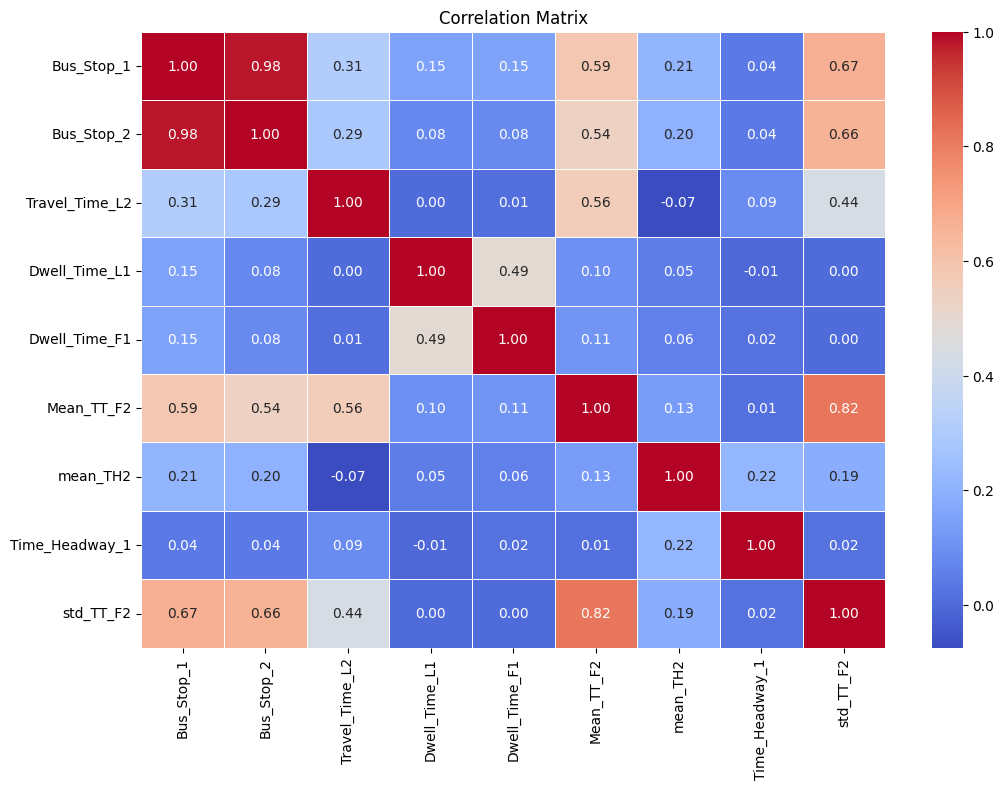

Cross-validated R-squared scores: [0.9070936  0.81458612 0.77247967 0.78406807 0.79618827]


In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Assuming your DataFrame is named df1
# Split the data into features (X) and target variable (Y)
X = df3[['Bus_Stop_1', 'Bus_Stop_2', 'Travel_Time_L2', 'Dwell_Time_L1',
       'Dwell_Time_F1', 'Mean_TT_F2', 'mean_TH2','Time_Headway_1',
       'std_TT_F2']]
Y = df3['Time_Headway_2']
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)


# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate MAPE on training data
mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)


# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Cross-validation
cv_scores = cross_val_score(best_model, X, Y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cv_scores)


In [13]:
df1 = pd.read_csv("E:\\1. Sem 3\\3. Results\\5. Apr New Data\\3. One step Model_Dataset\\Headway_model_dataset.csv")

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 4458.674821531834
R-squared Score: 0.8758252533954399
Adjusted R-squared Score: 0.8742281505452205
Mean Absolute Error: 35.250131346300954
Root Mean Squared Error: 66.77330920009756
Mean Absolute Percentage Error (MAPE) : 3.0359768869413255


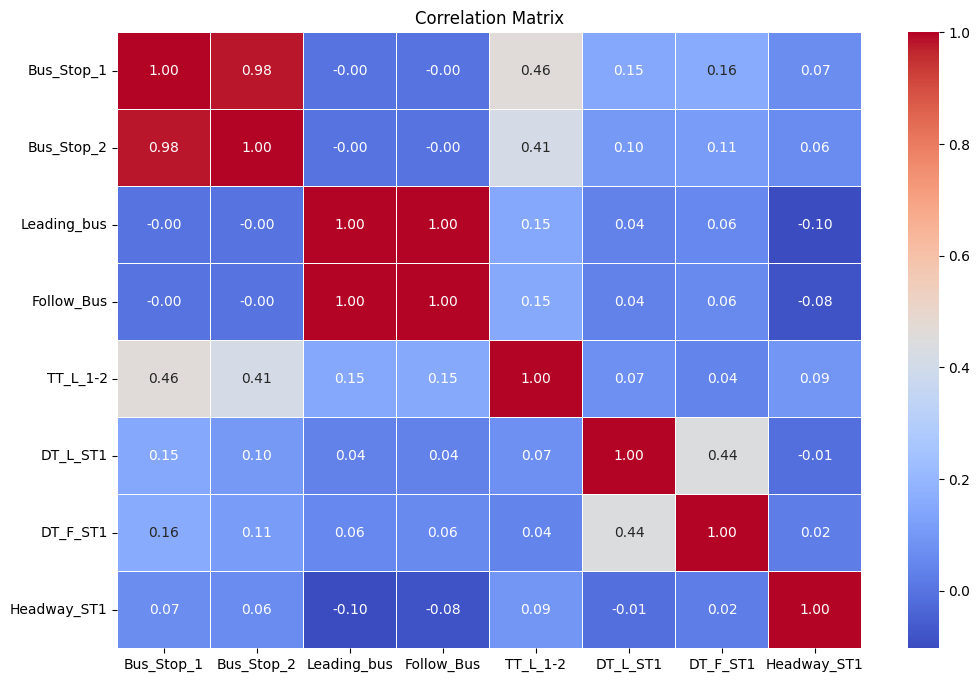

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate Adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n_samples = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))
    return adjusted_r2

# Assuming your DataFrame is named df1
# Split the data into features (X) and target variable (Y)
X = df1[['Bus_Stop_1', 'Bus_Stop_2', 'Leading_bus', 'Follow_Bus', 'TT_L_1-2',
       'DT_L_ST1', 'DT_F_ST1', 'Headway_ST1']]
Y = df1['Target_Headway_ST2']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, Y_pred)
print("R-squared Score:", r2)

# Calculate Adjusted R-squared
n_features = X_train.shape[1]
adj_r2 = adjusted_r2_score(Y_test, Y_pred, n_features)
print("Adjusted R-squared Score:", adj_r2)

# Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Define mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE on training data
mape_test = mean_absolute_percentage_error(Y_test, Y_pred)
print("Mean Absolute Percentage Error (MAPE) :", mape_test)

# Collinearity Check (using correlation matrix)
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
